# Viewing Self-Play Data

In [1]:
import numpy as np
import tensorflow as tf

from keras.callbacks import *
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.initializers import *
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
import keras.backend as K
from keras.regularizers import l2
from keras.engine.topology import Layer

from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

Using TensorFlow backend.


In [2]:
dataPath = 'linked_data/StageFour-AlphaZero-Competition-2018-10-24-15-29-35AlphaZero-it1500-dir0.03-c:4-512-5x4-sig0.2-mean0.6-23:21-24_10_2018.npz'

In [3]:
data = np.load(dataPath)

In [4]:
input_data = data['input']
policy_data = data['policy']
value_data = data['value']

In [5]:
print(input_data.shape)
print(policy_data.shape)
print(value_data.shape)

(512, 11, 13)
(512, 11, 13)
(512, 1)


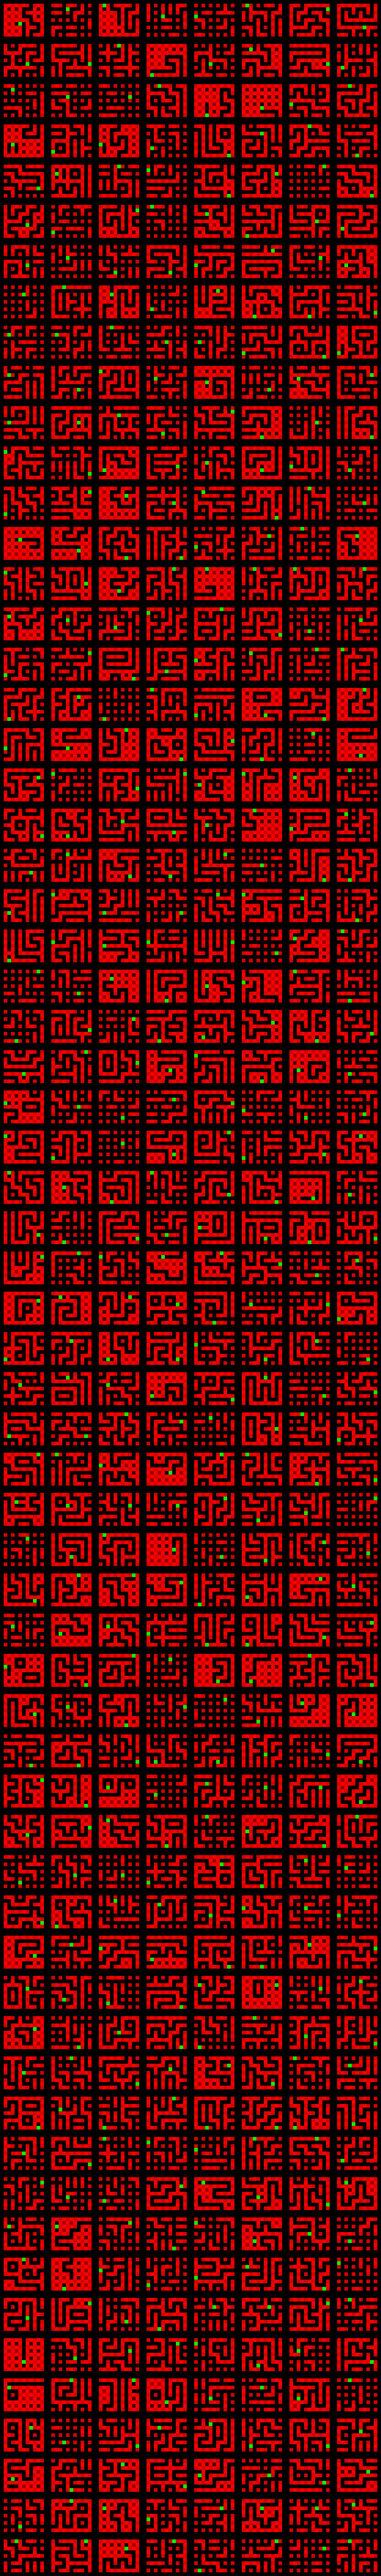

In [45]:
sample = 1
#print(input_data[sample])
#print("="*80)
#print(policy_data[sample])
#print("="*80)
#print(value_data[sample])
#print(zero_img.shape)
#print(input_data[sample].shape)
#print(policy_data[sample].shape)

w = input_data.shape[2]
h = input_data.shape[1]
sample_cnt = input_data.shape[0]
columns = 8
c = columns

big_img_input = np.zeros((h * (sample_cnt / columns), w * columns), dtype=np.uint8)
big_img_policy = np.zeros((h * (sample_cnt / columns), w * columns), dtype=np.uint8)
big_img_zero = np.zeros((h * (sample_cnt / columns), w * columns), dtype=np.uint8)

zero_img = np.zeros((h, w), dtype=np.uint8)
one_img = np.full((h, w), 255, dtype=np.uint8)
for i in range(sample_cnt): #range(input_data.shape[0]):
    #merged_imgdata = np.stack([input_data[sample], policy_data[sample], zero_img], axis=2)
    big_img_input[(i / c) * h : ((i / c)+1) * h, (i % c) * w : ((i % c)+1) * w] = input_data[i]
    big_img_policy[(i / c) * h : ((i / c)+1) * h, (i % c) * w : ((i % c)+1) * w] = policy_data[i]
    #print(str((i / c) * h) + " : " +
    #      str(((i / c)+1) * h) + ", " +
    #      str((i % c) * w) + " : " +
    #      str(((i % c)+1) * w))
    

#merged_imgdata = np.stack([input_data[sample], policy_data[sample], zero_img], axis=2)
merged_imgdata = np.stack([big_img_input, big_img_policy, big_img_zero], axis=2)

#create image
#img = Image.fromarray(big_img, 'RGB')
img = Image.fromarray(merged_imgdata, 'RGB')
#img = Image.fromarray(big_img_input, 'RGB')
img = img.resize(size=(img.size[0]*10, img.size[1]*10))


img